### 2. Convex optimization problems

#### 2.1 "Hello World" in CVX


$$
minimize~~f_0(x_1, x_2) \\
s.t.~~ 2x_1 + x_2 \ge 1 \\
~~~~ x_1 + 3 x_2 \ge 1 \\
~~~~ x_1 \ge 0, x_2 \ge 0
$$

Et les deux fonctions objectifs:

$$
f_0(x_1, x_2) = x_1 + x_2 \\
f_0(x_1, x_2) = x_1^2 + 9 x_2^2 
$$

In [7]:
import cvxpy as cp

# Create two scalar optimization variables.
x1 = cp.Variable()
x2 = cp.Variable()

# Create four constraints
constraints = [
    2*x1 + x2 >=1,
    x1 + 3*x2 >= 1,
    x1 >= 0,
    x2 >= 0
]


In [8]:
# Form objective.
obj = cp.Minimize(x1 + x2)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x1.value, x2.value)

status: optimal
optimal value 0.5999999999116253
optimal var 0.3999999999724491 0.1999999999391762


In [10]:
# Form objective.
obj = cp.Minimize(x1**2 + 9*x2**2)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x1.value, x2.value)

status: optimal
optimal value 0.49999999910199733
optimal var 0.49999614401180614 0.16666795201864573


#### 2.2 XXX

**The LP relaxation is:**

$$
minimize~~c^Tx \\
s.t.~ Ax \le b \\
~~~~~~~~~~~ 0 \le x \le 1
$$

Let $x^{rlx}$ be a solution of the LP relaxation, so $L=c^T x^{rlx}$ is a lower bound on $p^*$

**Meaning of the variables:**
* $x_i$ is a job we either accept or decline
* $-c_i$ as the (positive) revenue we generate if we accept job $i$
* $Ax \le b$ as a set of limits on $m$ resources
* $A_{ij}$, which is positive, is the amount of resource $i$ consumed if we accept job $j$
* $b_i$, which is positive, is the amount of resource $i$ available

In [40]:
import numpy as np

np.random.seed(0)
n = 100     
m = 300
A = np.random.rand(m, n)
b = np.matmul(A, np.ones((n, 1)))/2
c = -np.random.rand(n, 1)

# Create one vector optimization variables.
x = cp.Variable((n,1))

# Create four constraints
constraints = [
    A*x <= b,
    x <= 1,
    x >= 0
]

# Form objective.
obj = cp.Minimize(np.transpose(c) * x)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
# Vector of values generated
print("optimal var", x.value[0:5])

status: optimal
optimal value -34.41722425996274
optimal var [[1.00000000e+00]
 [9.50418017e-01]
 [6.42033899e-11]
 [1.00000000e+00]
 [8.10921844e-01]]


**Follow-up:** 

The value $L=-34.417$ is a lower bound on $p^*$

**Next exercise:**

The relaxed solution $x^{rlx}$ can also be used to guess a Boolean point $\hat{x}$, by rounding its entries, based on a threshold $t \in [0,1]$:

$$
\hat{x}_i = 
\left \{
\begin{array}{c @{=} c}
    1 & x^{rlx} \ge t \\
    0 & otherwise \\
\end{array}
\right.
$$

Carry out threshold rounding for (say) 100 values of $t$, uniformly spaced over $[0,1]$. For each value of $t$, note the objective value $c^T \hat{x}$ and the maximum constraint violation $max_i(A \hat{x}-b)_i$. Plot the objective value and maximum violation versus $t$.

In [109]:
t = np.random.rand(100)

# 1. Computation of x hat
# Dimension of x_hat is:
# nb of line is 100
# nb of columns is dimension of x^rlx
x_hat = np.ones((100, x.shape[0]))

# Réflechir à comment on pourrait rendre ça plus beau
i = 0
j = 0

for v in t:
    for xo in x.value:
        if xo < v:
            x_hat[i][j] = 0
        j = j + 1
        
    i = i + 1
    j = 0
    
# 2. Computation of the objective function
obj_value = np.ones((x.shape[0]))
len_obj_value = len(obj_value)   

for i in range(0, len_obj_value):
    obj_value[i]  = np.dot(np.transpose(c), x_hat[i,:])
    
# 3. Compute the maximum violation value
max_viol = np.ones((x.shape[0]))

for i in range(0, len_obj_value):
    max_viol[i] = np.amax(np.matmul(A, x_hat[i, :]) - b)

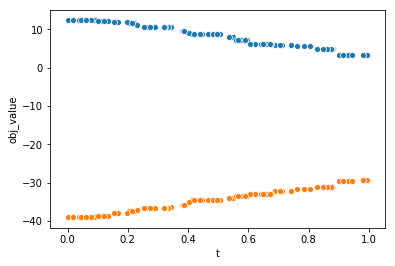

In [108]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({'t': t, 'obj_value': obj_value, 'max_viol': max_viol})

ax = sns.scatterplot(x="t", y="max_viol", data=df)

sns.scatterplot(x="t", y="obj_value", data=df, ax=ax)

Find a value of $t$ for which $\hat{x}$ is feasible, and gives minimum objective value, and note the associated upper bound $U$. What is the gap $U - L$ between the upper bound on $p^*$ and the lower bound on $p^*$.

U = min(obj(find(maxviol<=0)))

In [111]:
np.where(max_viol <= 0)

(array([], dtype=int64),)

In [112]:
max_viol

array([12.05918011,  8.6615211 , 11.73198298,  5.83482235, 12.05918011,
       10.57588816,  7.11396115,  3.24453309,  7.9923633 , 12.00505126,
        7.11396115,  5.77784199, 12.00505126, 11.73198298, 12.05918011,
        5.77784199,  6.20095242,  4.78245095,  3.35953342, 12.37912226,
       12.05918011,  6.20095242,  9.67174284, 10.57588816,  9.67174284,
        8.6615211 ,  3.35953342, 12.00505126, 12.37912226,  8.6615211 ,
       12.37912226,  7.11396115,  7.11396115,  7.9923633 , 12.05918011,
        7.11396115, 12.00505126, 11.73198298,  5.83482235,  3.24453309,
        4.78245095,  5.83482235,  4.78245095,  4.78245095,  8.6615211 ,
        7.9923633 ,  6.20095242,  3.35953342, 12.37912226,  9.67174284,
       12.37912226, 10.57588816,  3.35953342,  3.35953342,  8.6615211 ,
        8.6615211 ,  4.78245095, 12.00505126, 10.57588816,  8.6615211 ,
       12.00505126, 12.37912226,  9.67174284,  5.83482235, 10.57588816,
       12.37912226,  3.24453309,  3.35953342,  6.20095242,  3.24

#### 2.3 Simple portfolio optimization

We consider a portfolio optimization problem as described on pages 155 and 185–186 of the book, with data that can be found in the file simple_portfolio_data.m.

Find minimum-risk portfolios with the same expected return as the uniform portfolio $x=(1/n)1$, with risk measured by portfolio return standard deviation, and the following portfolio constraints (in addition to $\mathcal{1}^Tx=1$).

What is the risk of the uniform portfolio ?
